In [1]:
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_table('Fecal_MAGs.aai.matrix.txt', index_col=0, header=0)
df.head()
df["pig7_9"]
df = df.replace(to_replace= 0.0, value = 100 )
#df.to_csv("Fecal_MAGs.aai.matrix_converted.txt", index=False, sep='\t')
df

,cow9_15,cow4_001,cow4_002,cow4_008,cow4_10,cow4_12,cow4_13,cow4_20,cow4_21,cow4_3,...,pig9_12,pig9_13,pig9_16,pig9_17,pig9_22,pig9_24,pig9_30,pig9_3,pig9_6,pig8_7
cow9_15,100.000000,35.371318,35.636579,35.098604,35.083516,35.384822,37.189550,35.549184,35.394470,35.522351,...,35.524284,36.735105,37.037386,36.994982,37.520200,36.804040,35.834302,35.284400,36.799373,35.565338
cow4_001,35.371318,100.000000,35.839528,37.320984,35.812757,35.486318,36.703355,35.651452,35.761020,35.266459,...,35.695106,36.578411,36.378499,38.195201,36.975279,36.900163,35.674693,35.159338,36.100087,35.620001
cow4_002,35.636579,35.839528,100.000000,43.613047,48.914999,50.727064,37.055352,48.768665,48.952475,45.076756,...,48.900286,36.494712,36.350359,37.624142,36.575069,36.626393,45.215077,35.280030,36.058683,48.523741
cow4_008,35.098604,37.320984,43.613047,100.000000,48.556845,35.575294,39.971313,47.824613,47.958425,41.146029,...,47.918331,39.185355,39.294366,36.662563,35.813119,36.337116,43.111232,36.580574,35.814957,47.400799
cow4_10,35.083516,35.812757,48.914999,48.556845,100.000000,53.674204,37.349080,59.090306,61.978645,44.469536,...,59.131039,36.811721,36.394512,37.972000,36.532688,36.431202,44.803171,35.514844,35.812167,59.465298
cow4_12,35.384822,35.486318,50.727064,35.575294,53.674204,100.000000,36.918388,54.071433,54.474352,44.947467,...,53.973587,36.561707,36.126829,36.104173,35.263668,35.863702,45.150192,35.381104,35.916421,54.245981
cow4_13,37.189550,36.703355,37.055352,39.971313,37.349080,36.918388,100.000000,36.988096,36.941803,36.542406,...,37.228474,50.354312,41.008650,44.514286,40.593973,41.325495,36.735121,37.080558,39.513193,36.936047
cow4_20,35.549184,35.651452,48.768665,47.824613,59.090306,54.071433,36.988096,100.000000,58.510313,44.493745,...,58.601068,36.504528,36.450492,37.839319,36.661411,36.191181,44.796313,35.370293,36.111613,96.697163
cow4_21,35.394470,35.761020,48.952475,47.958425,61.978645,54.474352,36.941803,58.510313,100.000000,44.787035,...,60.140695,36.408609,36.379308,37.716117,36.671878,36.336480,45.130869,35.154047,35.996640,58.542302
cow4_3,35.522351,35.266459,45.076756,41.146029,44.469536,44.947467,36.542406,44.493745,44.787035,100.000000,...,44.365539,35.937359,36.427437,36.848108,35.929321,36.389678,54.877683,34.692106,35.674256,44.573407


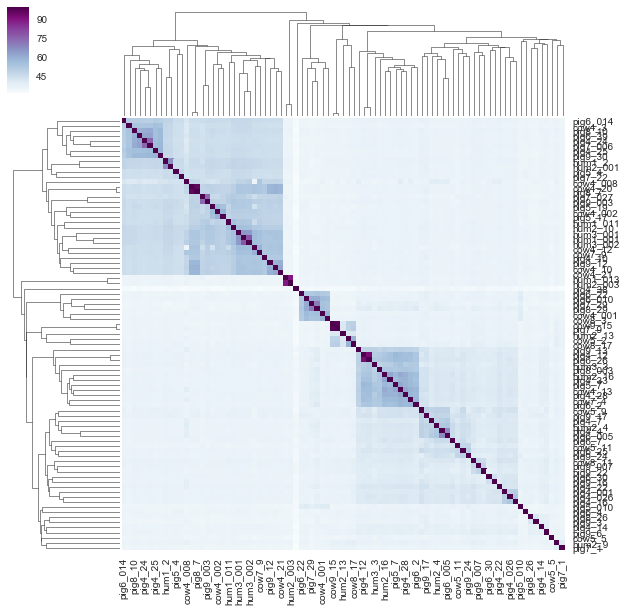

In [44]:
m = sns.clustermap(df, cmap="BuPu", yticklabels=True)


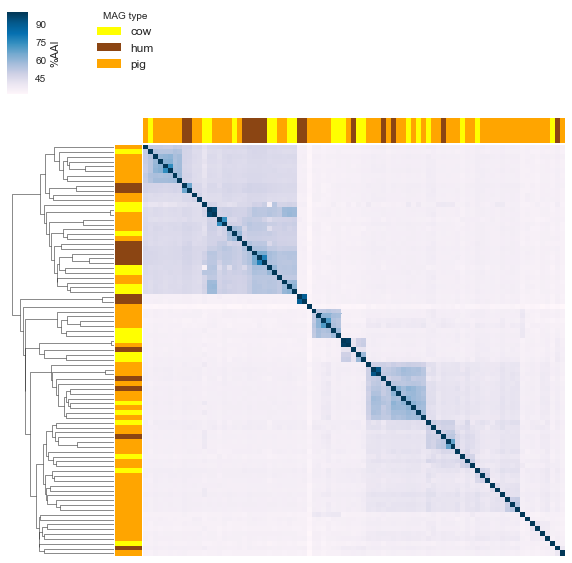

In [8]:
#Get Table with bin name and animal host type
row_names = pd.DataFrame(columns = ["MAG"])
row_names["MAG"] = df.index
row_names["host_type"] = row_names["MAG"].str.extract("(pig|cow|hum)")[0]
#Add column to table with color
my_palette = dict(zip(row_names["host_type"].unique(), ["yellow","saddlebrown","orange"]))
row_names["colors"] = row_names["host_type"].map(my_palette) 

hm_pallate = dict(zip(list(row_names.MAG), list(row_names.colors)))
row_colors = df.index.map(hm_pallate)

#plt.subplots(figsize=(20,15))
colbar_kws = {'label':'%AAI'}
m = sns.clustermap(df, cmap="PuBu", yticklabels=False, xticklabels=False, 
                   row_colors=row_colors, col_colors=row_colors, cbar_kws=colbar_kws)

#Still cluster the columns but remove the dendrogram
m.ax_col_dendrogram.set_visible(False)

for label in row_names["host_type"].unique():
    m.ax_row_dendrogram.bar(0, 0, color=my_palette[label],
                            label=label, linewidth=0)

m.ax_row_dendrogram.legend(loc="upper right", bbox_to_anchor=(1.47, 1.35), fontsize="large", title="MAG type")


plt.savefig("Fecal_MAGs_ANI_heatmap.pdf")

In [6]:
row_names

,MAG,host_type,colors
0,cow9_15,cow,orange
1,cow4_001,cow,orange
2,cow4_002,cow,orange
3,cow4_008,cow,orange
4,cow4_10,cow,orange
5,cow4_12,cow,orange
6,cow4_13,cow,orange
7,cow4_20,cow,orange
8,cow4_21,cow,orange
9,cow4_3,cow,orange


In [96]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
species.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

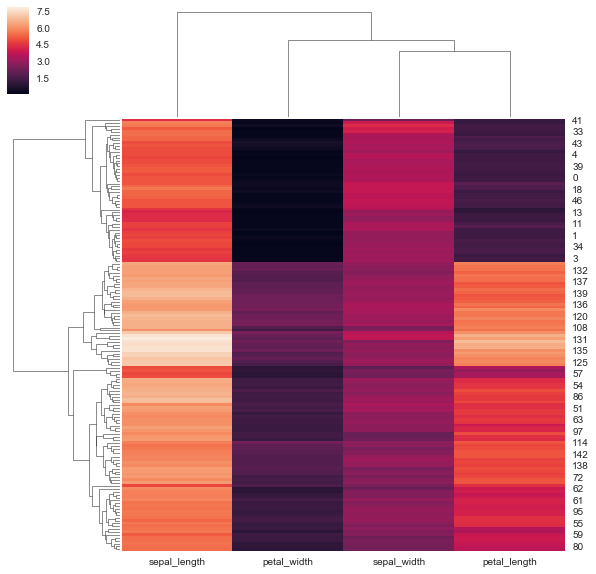

In [23]:
iris = sns.load_dataset("iris")
species = iris.pop("species") #rms the last column of the iris df, which is the spp column
g = sns.clustermap(iris)

In [27]:
#Creates a dictionary with the species name and color.
## zip() combines 2 lists together: species.uniquie() and "rbg"
## dict() converts the list to a dict
lut = dict(zip(species.unique(), "rbg"))
print(lut)

#Maps the spp. NAME in species with the COLOR is dict "lut" and creates a new list with the colors
row_colors = species.map(lut)
row_colors.head()

{'setosa': 'r', 'versicolor': 'b', 'virginica': 'g'}


0    r
1    r
2    r
3    r
4    r
Name: species, dtype: object

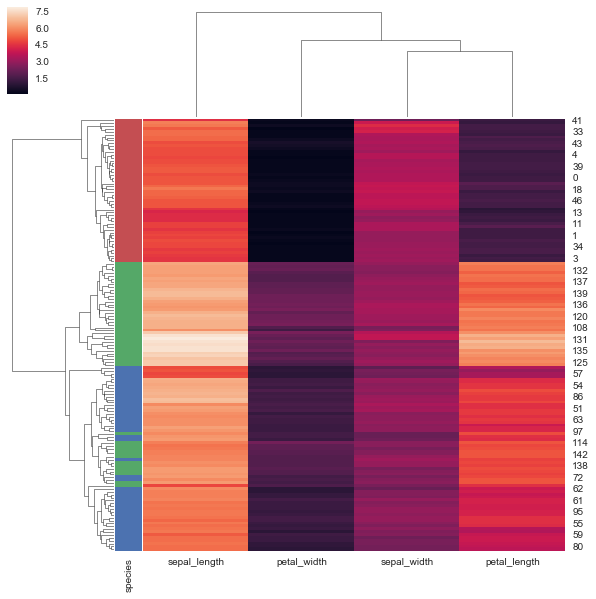

In [26]:
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)
g = sns.clustermap(iris, row_colors=row_colors)